In [458]:
include("sim.jl")

simulate_pomdp (generic function with 1 method)

In [ ]:
@time roadway, scenes = simulate_pomdp()

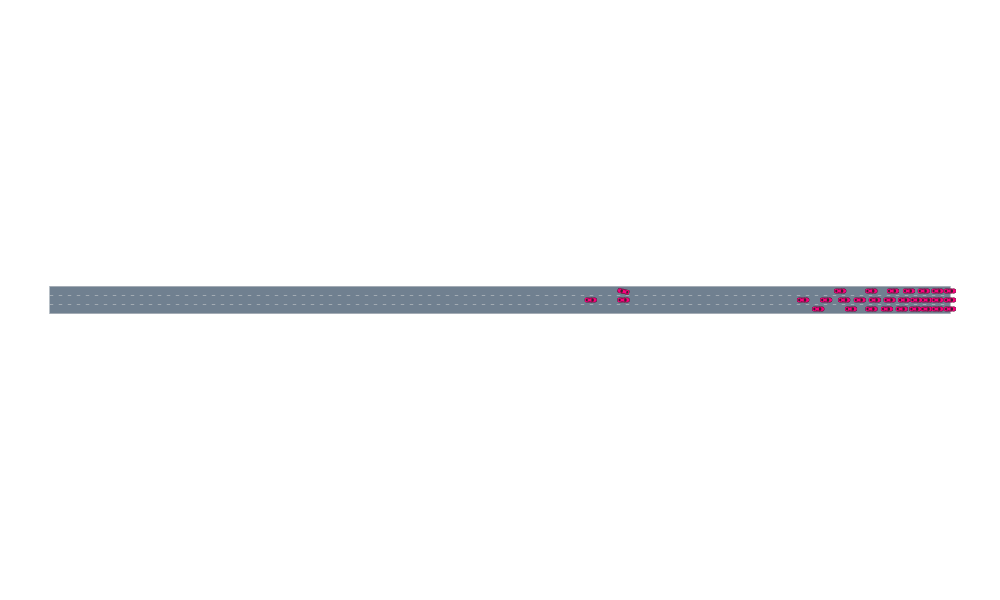

In [457]:
render(scenes[end], roadway, cam = FitToContentCamera()) # CarFollowCamera(1)

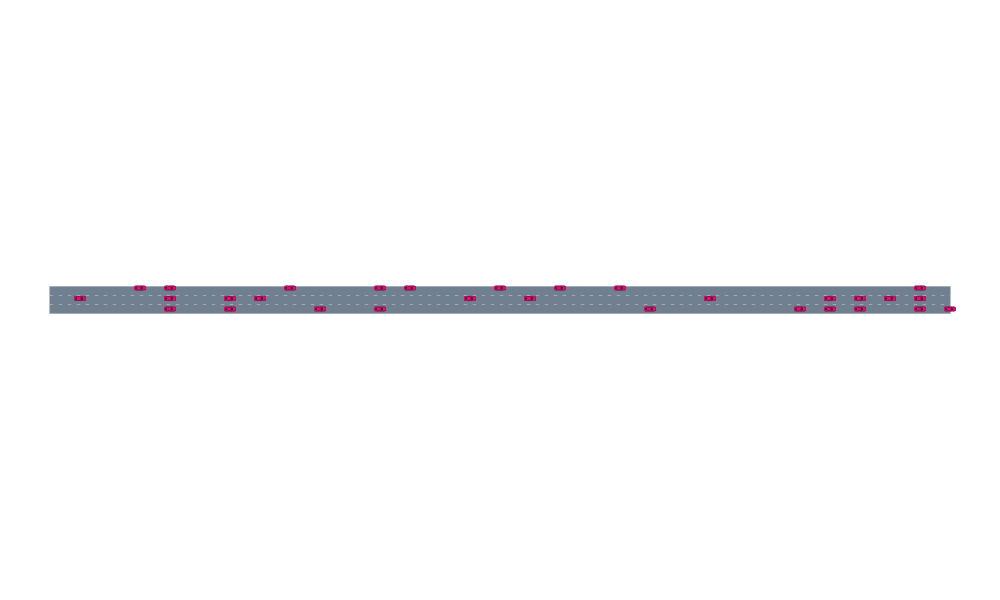

In [451]:
render(scenes[1], roadway, cam = FitToContentCamera())

In [421]:
@show length(scenes)

length(scenes) = 154


154

In [53]:
@show scenes[1][2].state.v

((scenes[1])[2]).state.v = 10.0


10.0

In [91]:
using Reel

In [92]:
function animate_record(scenes::Vector{Scene},dt::Float64, roadway::Roadway{Float64}, cam=FitToContentCamera())
    duration =size(scenes)[1]*dt::Float64
    fps = Int(1/dt)
    function render_rec(t, dt)
        frame_index = Int(floor(t/dt)) + 1
        return render(scenes[frame_index], roadway, cam=cam)
    end
    return duration, fps, render_rec
end

animate_record (generic function with 2 methods)

In [429]:
duration, fps, render_hist = animate_record(scenes, 0.1, roadway)
film = roll(render_hist, fps = fps, duration = duration)
write("simulation.mp4", film)

"simulation.mp4"